<a href="https://colab.research.google.com/github/Kevin2558/Curso_Data_Science/blob/master/03_Transformaciones/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

Como funciona:

Es un tipo de agrupacion similar a PCA, que lo que hace es reducir la dimensionalidad. Tiene la ventaja que se puede decodificar y volver a los datos originales y de que puede capturar relaciones no lineales. Autoencoders son redes neuronales entrenadas para reconstruir sus entradas. Aprenden una representacion comprimida (latente).

Su estrutura viene dada por:

- Encoder: Proyecta a espacio latente (reducir la dimensionalidad).
- Decoder: Reconstruye la entrada original desde el espacio latente.

Elige los pesos de la red neuronal a través de minimizar el error que ocurre en la reconstruccion de los datos.

Aunque este no es un proceso supervisado, cuando se construye la red hay un entrenamiento para encontrar los pesos y armar los encoders y decoders.

Tipos de autoencoders:

- Clasico: Capas totalmente conectadas, activaciones no lineales.
- Convolucional: Usa convoluciones, ideal para imagenes.
- Denoising: Entrena para reconstruir desde entradas corruptas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

Dataset a utilizar

In [ ]:
wine = load_wine()
X = wine.data

Preprocesamiento de los datos.

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

División de los datos.

In [ ]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [ ]:
X.shape

(178, 13)

Definamos la arquitectura del autoencoder

In [ ]:
input_dim = X.shape[1]
encoding_dim = 2 # Dimension del espacio latente

Procedamos al armado de la red. Haremos capas intermedias debido a que bajar de una dimensión 13 a una dimensión 2 es demasiado.

In [ ]:
# Capa inicial
input_layer = Input(shape=(input_dim,))
# Primera capa de la red
encoded = Dense(8, activation='relu')(input_layer)
# Capa intermedia
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Primera capa de decomprension
decoded = Dense(8, activation='relu')(encoded) # Funciones de activacion
# Capa final
decoded = Dense(input_dim, activation='linear')(decoded)

Ahora procedemos a construir la red en un modelo.

In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

Compilar y entrenar

In [ ]:
autoencoder.compile(optimizer=Adam(learning_rate=0.01), # Algoritmo de optimizacion
                    loss=MeanSquaredError()) # Metrica de reconstruccion

# Con lo siguiente podemos guardar la historia de como fue ocurriendo el
# entrenamiento
history = autoencoder.fit(X_train, X_train,
                          validation_data=(X_test, X_test),
                          epochs=100, # Numero de epocas de entrenamiento
                          batch_size=16,
                          verbose=0
                          )

Ahora, vamos a visualizar como ocurrio el entrenamiento, las perdidas que dejó la historia del entrenamiento.

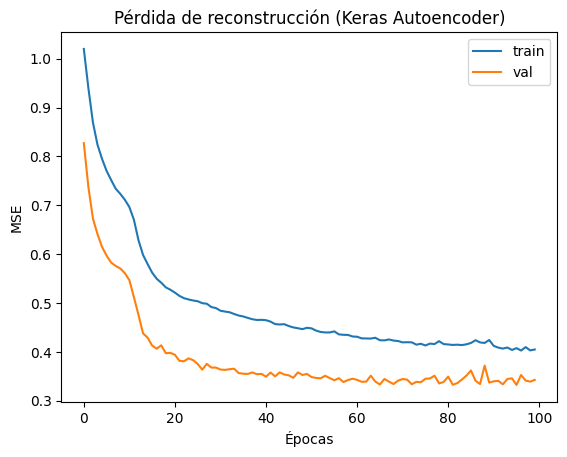

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Pérdida de reconstrucción (Keras Autoencoder)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.show()

Por último, veremos la proyeccion en el espacio latente.

Aqui en encoder va a reducir a dos variables y es lo que visualizaremos.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<ipython-input-32-c5df787dae6c>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_latent[:, 0], X_latent[:, 1], cmap='tab10')


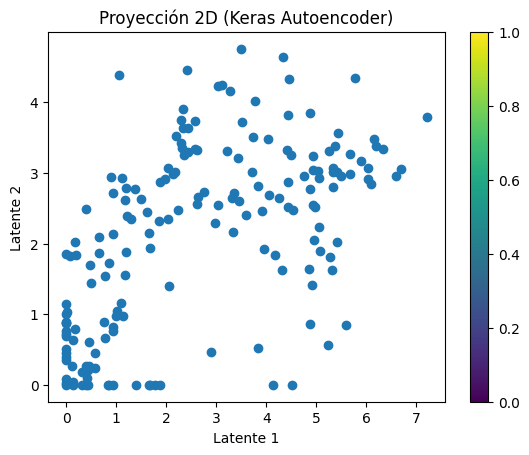

In [ ]:
X_latent = encoder.predict(X_scaled)
plt.scatter(X_latent[:, 0], X_latent[:, 1], cmap='tab10')
plt.title("Proyección 2D (Keras Autoencoder)")
plt.xlabel("Latente 1")
plt.ylabel("Latente 2")
plt.colorbar()
plt.show()

Ahora lo que haremos será un ejercicio para ver como Autoencoders nos sirve para la detección de outliers.

In [ ]:
X_recon = autoencoder.predict(X_scaled)
# Error de reconstruccion
reconstruction_error = np.mean((X_scaled - X_recon)**2, axis=1)
# Umbral para detectar outliers
threshold = np.percentile(reconstruction_error, 95)
outliers = reconstruction_error > threshold

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Visualicemos lo errores de construccion.

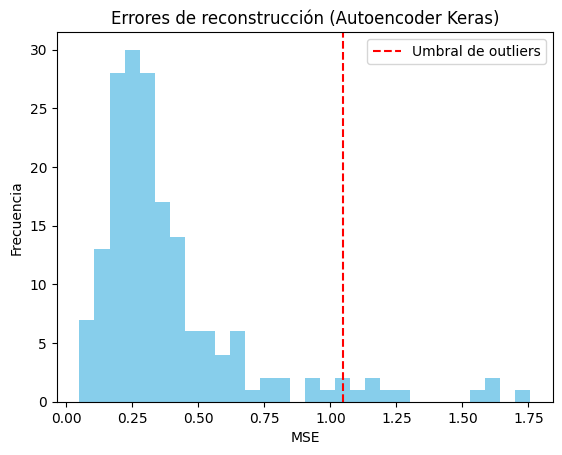

In [ ]:
plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color='r', linestyle='--', label='Umbral de outliers')
plt.title("Errores de reconstrucción (Autoencoder Keras)")
plt.xlabel("MSE")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Visualicemos los outliers

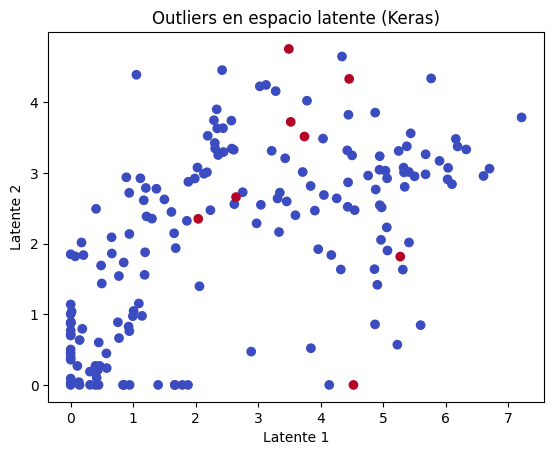

In [ ]:
plt.scatter(X_latent[:, 0], X_latent[:, 1], c=outliers, cmap='coolwarm')
plt.title("Outliers en espacio latente (Keras)")
plt.xlabel("Latente 1")
plt.ylabel("Latente 2")
plt.show()